# Revision redaction

In [1]:
import pandas as pd
import geopandas as gd
import matplotlib.pyplot as plt

df = pd.read_csv("patient-data-anonymisation-exercise.csv")
df.head()

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,034e9e3b-2def-4559-bb2a-7850888ae060,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
1,034e9e3b-2def-4559-bb2a-7850888ae060,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
2,034e9e3b-2def-4559-bb2a-7850888ae060,2015-01-26T17:45:28Z,2015-01-26T18:15:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
3,034e9e3b-2def-4559-bb2a-7850888ae060,2016-12-29T17:45:28Z,2016-12-29T18:00:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
4,034e9e3b-2def-4559-bb2a-7850888ae060,2017-01-09T17:45:28Z,2017-01-09T18:00:28Z,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531


In [2]:
# l'histoire du patient de Carmelia Konopelski :

df[df["PATIENT_ID"] == "71ba0469-f0cc-4177-ac70-ea07cb01c8b8"]

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
703,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2002-01-15T20:46:46Z,2002-01-15T21:01:46Z,ambulatory,Encounter for problem,129.16,54.16,NaN,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
704,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2002-01-25T20:46:46Z,2002-01-25T21:37:46Z,ambulatory,Encounter for problem,129.16,54.16,NaN,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
705,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2002-11-28T20:46:46Z,2002-12-12T20:46:46Z,ambulatory,Encounter for symptom,129.16,54.16,Perennial allergic rhinitis with seasonal vari...,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
706,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2003-04-29T20:46:46Z,2003-04-29T21:01:46Z,wellness,Well child visit (procedure),129.16,54.16,NaN,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
707,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2003-05-11T20:46:46Z,2003-05-11T21:01:46Z,ambulatory,Encounter for symptom,129.16,54.16,Streptococcal sore throat (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-05-08T20:46:46Z,2012-05-08T21:01:46Z,ambulatory,Postoperative follow-up visit (procedure),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
784,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-05-08T20:46:46Z,2012-05-09T21:07:46Z,inpatient,Screening surveillance (regime/therapy),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
785,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-05-08T20:46:46Z,2012-05-09T21:16:46Z,inpatient,Gynecology service (qualifier value),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
786,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-08-14T20:46:46Z,2012-08-14T21:01:46Z,ambulatory,Postoperative follow-up visit (procedure),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PATIENT_ID         53346 non-null  object 
 1   START              53346 non-null  object 
 2   STOP               53346 non-null  object 
 3   ENCOUNTERCLASS     53346 non-null  object 
 4   DESCRIPTION        53346 non-null  object 
 5   TOTAL_CLAIM_COST   53346 non-null  float64
 6   PAYER_COVERAGE     53346 non-null  float64
 7   REASONDESCRIPTION  13777 non-null  object 
 8   BIRTHDATE          53346 non-null  object 
 9   DEATHDATE          14287 non-null  object 
 10  SSN                53346 non-null  object 
 11  DRIVERS            49285 non-null  object 
 12  PASSPORT           46965 non-null  object 
 13  FIRST              53346 non-null  object 
 14  LAST               53346 non-null  object 
 15  MAIDEN             16597 non-null  object 
 16  MARITAL            436

In [4]:
gdf = gd.GeoDataFrame(df, crs="EPSG:4326", geometry=gd.points_from_xy(df.LON, df.LAT))

In [5]:
#gdf.crs = {"init" :'epsg:3857'}

In [6]:
# import pyproj
# pyproj.Proj("+init=epsg:4326")

In [7]:
import contextily as ctx

# reproject

gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite, zoom=12)
ax.set_axis_off()

RuntimeError: b'no arguments in initialization list'

In [8]:
# Préciser les colonnes pour l'éloignement
suppression = ["SSN", "DRIVERS", "PASSPORT", "FIRST", "LAST", "MAIDEN", "ADDRESS", "ZIP"]
# Et les laisser tomber
df.drop(suppression, axis=1, inplace=True)

In [9]:
import uuid

str(uuid.uuid4())

'e590be47-5ca4-42f1-9a49-04f3baf76b25'

In [10]:
import numpy as np

sigma = 0.001 # l'écart-type, c'est-à-dire le degré de variation par rapport aux données originales que nous autorisons
mu = 1 # les données originales, considérées comme la "moyenne"

np.random.normal(mu, sigma)

0.9991022485437353

In [11]:
from collections import defaultdict

class Pseudonymise:
    
    def __init__(self, sigma=0.001):
        # Initialiser un dictionnaire par défaut, cela crée un élément de dictionnaire par défaut s'il n'existe pas
        # Nous utilisons cette méthode pour garantir l'intégrité des données tout en les rendant aléatoires
        # http://ikigomu.com/?p=28
        self.sigma = sigma
        self.mu = 0 # Nous voulons nous écarter de la vérité
        # Pseudo-patient dict
        self.pp = defaultdict(lambda: {"uuid":str(uuid.uuid4()),
                                       "lat": np.random.normal(self.mu, self.sigma),
                                       "lon": np.random.normal(self.mu, self.sigma)
                                      })
        
    def create_data(self, identities):
        """
        Pour chaque identité unique produire un UUID unique, et un gaussien randomisé "LAT" et "LON".

        Parameters
        ----------
        identities: liste des chaînes de caractères

        Returns
        -------
        dict
            Chaque entrée de dict contient un enregistrement contenant un "uuid" et un modificateur pour "lat" et "lon".
        """
        for _id in identities:
            self.pp[_id]
        return self.pp
    
    def redact(self, row):
        """
        Pour une ligne donnée dans un dataframe, retournez la version pseudonymisée de "PATIENT_ID", "LAT", "LON".
        
        Parameters:
        row : Ligne de la trame de données
        
        row:
        DataFrame tranche de ligne 
        """
        return [
            self.pp[row["PATIENT_ID"]]["uuid"],
            row["LAT"] + self.pp[row["PATIENT_ID"]]["lat"],
            row["LON"] + self.pp[row["PATIENT_ID"]]["lon"],
        ]

p = Pseudonymise()
pp_data = p.create_data(df["PATIENT_ID"])
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
fields = ["PATIENT_ID", "LAT", "LON"]
df[fields] = df[fields].apply(p.redact, axis=1, result_type="expand")

In [12]:
gdf = gd.GeoDataFrame(df, crs="EPSG:4326", geometry=gd.points_from_xy(df.LON, df.LAT))
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite, zoom=12)
ax.set_axis_off()

RuntimeError: b'no arguments in initialization list'

# Revision agregation

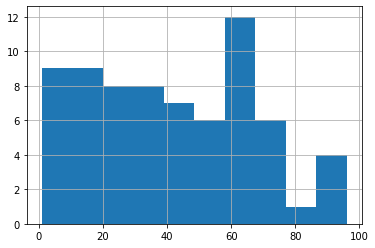

In [13]:
df = df.copy()
# Convertir les champs de date en dates de pandas
for c in ["START", "STOP", "BIRTHDATE", "DEATHDATE"]:
    df[c] = df[c].apply(lambda x: pd.to_datetime(x, errors="coerce", dayfirst=True).date())
# Filtre pour le traitement médical final pour tous les patients décédés
df = df[df.STOP==df.DEATHDATE]
df.sort_values(by="STOP", inplace=True)
df.drop_duplicates(subset="PATIENT_ID", keep="last", inplace=True)
# Créer le DEATHAGE 
# Il s'agit d'un calcul TRÈS approximatif de l'âge au décès
df["DEATHAGE"] = df.DEATHDATE.apply(lambda x: x.year) - df.BIRTHDATE.apply(lambda x: x.year)
# Et tirez la répartition des décès, divisée en n bacs
df["DEATHAGE"].hist(bins=10)